##ASSIGNMENT
#Dataset
Assume you are a scientist who is trying to make a propellent and is trying many tests to make an efficient propellent .
<br>
You have performed two tests.
<br>
From the two tests you would like whether this propellent works efficiently or not.
Build your own logistic regression model to decide .
<br>
Text with "DO NOT EDIT THIS CODE" needs to be only run do not edit it


In [4]:
#import libraries
#write your code.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import math



In [5]:
#load data

#write your code
with open('data.txt', 'r') as file:
    data = np.loadtxt(file, delimiter=',')

X_train = data[:, :-1]  # Features (Test 1 and Test 2)
y_train = data[:, -1]    # Labels (0 or 1)



In [6]:
#plot data to visualise
def plot_data(X,y,pos_label="y=1", neg_label="y=0"):
#positive_label and negative_label refers to classes of y as y can be 0 or 1
#While plotting graph the label parameter will be either positive_label or negative_label so plot both the labels for X
#write your code
    plt.scatter(X[np.where(y == 1), 0], X[np.where(y == 1), 1], marker='o', color='b', label=pos_label)
    plt.scatter(X[np.where(y == 0), 0], X[np.where(y == 0), 1], marker='x', color='r', label=neg_label)





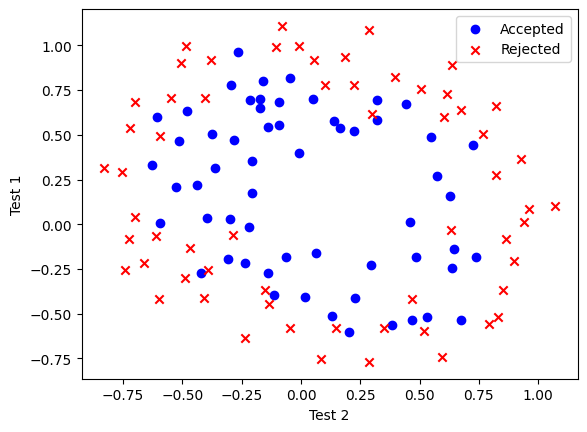

In [7]:
#test
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")


plt.xlabel('Test 2')
plt.ylabel('Test 1')
plt.legend(loc="upper right")
plt.show()


In [52]:
#feature mapping
def map_feature(X1, X2):
    # Create polynomial features up to degree 20
    poly = PolynomialFeatures(degree=3, include_bias=False)
    mapped_X = poly.fit_transform(np.column_stack((X1, X2)))
    
    # Add additional feature (Test2 - 0.25)^2 + (Test1 - 0.25)^2
    additional_feature = ((X2 - 0.0) ** 2 + (X1 - 0.0) ** 2).reshape(-1, 1)
    additional_feature2 = ((X2 - 0.25) ** 2 + (X1 - 0.25) ** 2).reshape(-1, 1)
    additional_feature3 = (((X2 - 0.55) ** 2 + (X1 + 0.375) ** 2)).reshape(-1, 1)
    # additional_feature4 = ((X2 - 1) ** 2 + (X1 + 0.75) ** 2).reshape(-1, 1)
    # mapped_X = np.hstack((mapped_X, additional_feature))
    mapped_X = np.hstack((mapped_X, additional_feature, additional_feature2, additional_feature3))
    
    return mapped_X



In [53]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 12)


In [54]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [55]:
#sigmoid function
def sigmoid(z):
#write your code
    return 1/(1 + np.exp(-1*z))




In [56]:
sigmoid_test(sigmoid)


Tests passed!


In [57]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [58]:
#computing cost
def compute_cost(X,y,w,b,lambda_=1):
#write your code
  yhat = sigmoid((X@ w) + b)
  loss = -1*np.mean(y*np.log(yhat) + (1 - y)*np.log(1 - yhat))
  return loss

In [59]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.777
Tests passed!


In [60]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
#write your code
  yhat = sigmoid((X@ w) + b)
  loss = -1*np.mean(y*np.log(yhat) + (1 - y)*np.log(1 - yhat)) + (lambda_ / (2 * len(y))) * np.sum(w**2)
  return loss

In [61]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [62]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 0.6824421316732153
All tests passed!


In [63]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [64]:
#compute gradient
def compute_gradient(X, y, w, b, lambda_=None):
#write your code
  yhat = sigmoid(X@w + b)

  # Compute gradients without regularization
  dj_dw = (1 / len(y)) * X.T @ (yhat - y)
  dj_db = (1 / len(y)) * np.sum(yhat - y)

  return dj_db, dj_dw

In [65]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.4915254236924827
dj_dw at test_w: [-0.008601361012465374, -0.09147300847306206]
Tests passed!


In [66]:
#compute regularised gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
#write your code
  yhat = sigmoid(X@w + b)

  # Compute gradients without regularization
  dj_dw = (1 / len(y)) * X.T @ (yhat - y)
  dj_db = (1 / len(y)) * np.sum(yhat - y)

  # Add regularization term to gradients if lambda_ is provided
  if lambda_ is not None:
      dj_dw += (lambda_ / len(y)) * w
      dj_db += 0  # Bias term does not have regularization

  return dj_db, dj_dw


  return dj_db,dj_dw

In [67]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [68]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.10426323438243787
Tests passed!


In [69]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01
iterations = 1000
alpha = 0.01
def gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_):
    w = initial_w.copy()
    b = initial_b
    m = len(y_train)
    J_history = []

    for iter in range(iterations):
        # Compute cost and gradient
        cost = compute_cost_reg(X_mapped, y_train, w, b, lambda_)
        dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, w, b, lambda_)

        # Update weights and bias
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Append cost to J_history for plotting
        J_history.append(cost)

    return w, b, J_history






  # return w, b, J_history, _

w,b, J_history= gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)


In [70]:
#plot decision boundary
def plot_decision_boundary(w,b,X,y):
#write your code
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))

    # Predict the boundary using trained weights and bias
    Z = predict(map_feature(xx1.ravel(), xx2.ravel()), w, b)
    Z = Z.reshape(xx1.shape)

    # Plot decision boundary and data points
    plt.contourf(xx1, xx2, Z, alpha=0.3)
    plot_data(X, y)
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    plt.title('Decision Boundary')
    plt.show()





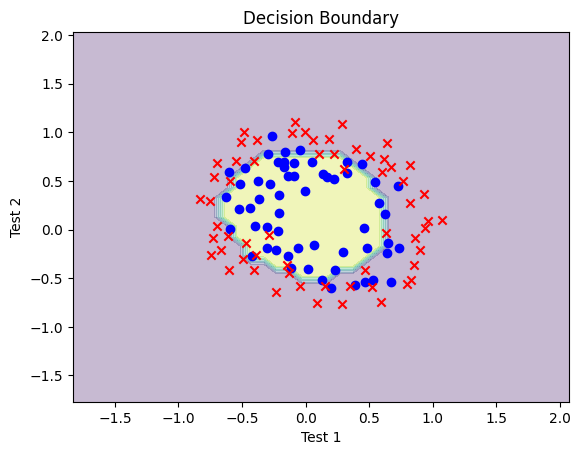

In [71]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [72]:
#predict your training model
def predict(X, w, b):
  m,n=X.shape
  p=np.zeros(m)
  yhat = sigmoid(X @ w + b)
  p[yhat >= 0.5] = 1
  return p


In [73]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))

Accuracy of training model: 80.508475
